In [364]:
################################################################
################################################################
#Company: Critical Techworks (CTW)
#Course: 7th. Data Academy lisbon - PT
#Module: Machine Learning & Artificial Intelligence
#Author: Carlos Fernando Arraz | Date: May 16th, 2024
#Lab 3: K-means aplicattions
################################################################
################################################################

---

**INSTRUCTIONS:**

---

1 - Make a copy of this file in your repository to start practicing;

2 - Study and review the theoretical content;

3 -Read the theory and follow the Python script line by line and its comments (execute the cells with **shift + ENTER** or play button to the left of each command/code block), studying the structures, the parts of the algorithm and the proposed logic;

4 - Execute, modify, test, and experiment with the content to the fullest to internalize the knowledge.


**Introduction and Objectives:**

This script is divided into 3 parts (I, II, and III), one to discuss theoretical concepts that support the K-means algorithm and a practical part with an exercise at the end.

The scripting objective is to show the relationship between the arithmetic mean and the point that minimizes the distance between points in a data set. In other words, given a set of data, whose Euclidean distance is used to evaluate distance, we know that the average (coordinate) of the points is representative among all the others minimizes the quantification of these distances between the other points.

# PARTE I: Brief Theory




## K-means introduction

The K-means algorithm is an **unsupervised machine learning** method used to group data into clusters (groups). It is widely used for data analysis and data mining, allowing you to identify patterns and structures in unlabeled datasets.

## Pseudo-algorithm:


1 - Choose the value of K, which represents the desired number of clusters.

2 - Randomly initialize the K initial centroids.

3 - Repeat until convergence occurs:

   * **Assignment** of points: For each point in the database, calculate the Euclidean distance between the point and all centroids. Assign/label the point to the cluster represented by the closest centroid.
   

   * **Update** of centroids: Calculate the new centroid of each cluster, which is the average of the database points assigned to that cluster.

4 - Check whether convergence has occurred. This can be done by checking whether there have been changes in the assignment of points to clusters in an iteration.

5 - If convergence does not occur, return to step 3.

6 - End of the algorithm. The final centroids represent the obtained clusters.

# PARTE II: Example in python and guided exercise

NOTE: The idea here is not to deepen studies on K-means, but rather to show the importance of the average in the algorithm architecture. The Centroid Assignment and Update steps are the main parts of the K-means algorithm.

In [365]:
from threadpoolctl import threadpool_info
from pprint import pprint
pprint(threadpool_info())

[{'filepath': 'C:\\tools\\Anaconda3\\Library\\bin\\mkl_rt.2.dll',
  'internal_api': 'mkl',
  'num_threads': 14,
  'prefix': 'mkl_rt',
  'threading_layer': 'intel',
  'user_api': 'blas',
  'version': '2023.1-Product'},
 {'filepath': 'C:\\tools\\Anaconda3\\vcomp140.dll',
  'internal_api': 'openmp',
  'num_threads': 20,
  'prefix': 'vcomp',
  'user_api': 'openmp',
  'version': None},
 {'filepath': 'C:\\tools\\Anaconda3\\Library\\bin\\libiomp5md.dll',
  'internal_api': 'openmp',
  'num_threads': 20,
  'prefix': 'libiomp',
  'user_api': 'openmp',
  'version': None}]


In [366]:
#Import libraries python
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#from sklearn.metrics import confusion_matrix, accuracy_score

from PIL import Image

In [367]:
#Define parameters to make a synthetic dataset
n_samples = 1000  #Number of samples 
random_state = 42 #Seed for repeatability

n_clusters = 4

#Initialize variable the make_blobs method with N clusters 
X, y, centroides = make_blobs(n_samples=n_samples,
                              random_state=random_state,
                              cluster_std = 1.5,  #TRY put other value (e.g. ,0.75, 1, 2, 3, 4, 5...)
                              centers = n_clusters,
                              return_centers=True,
                              )

In [368]:
#Check coord. centroides
centroides

array([[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959],
       [-8.83832776,  7.32352292]])

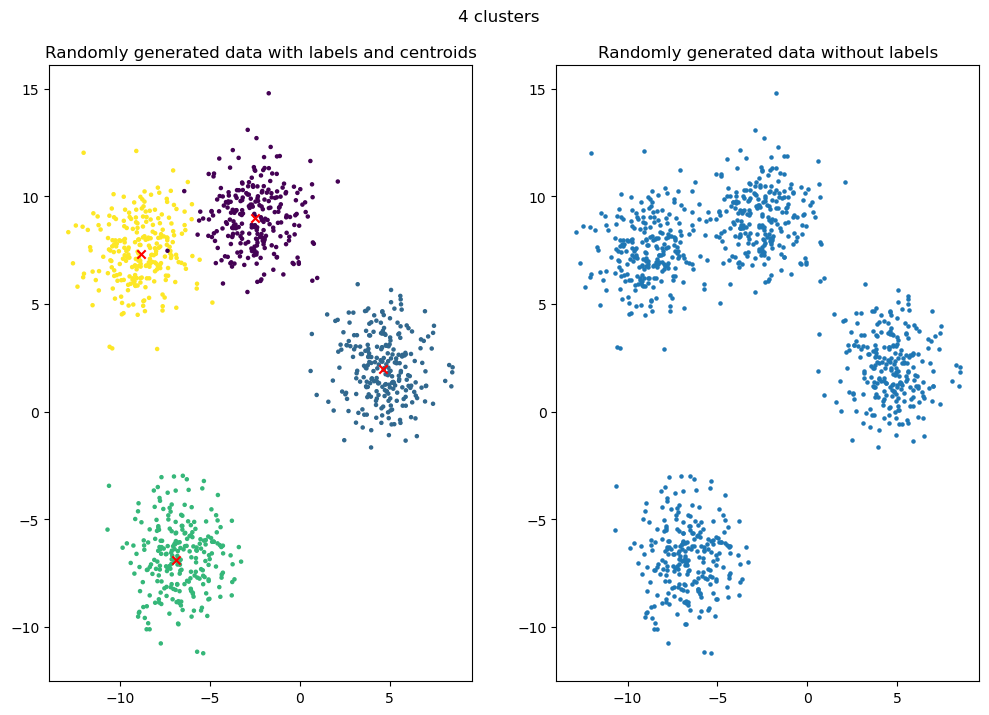

In [369]:
#Plot the clusters in 2-Dimensions
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

axs[0].scatter(X[:, 0], X[:, 1], c=y, s=5)
axs[0].scatter(centroides[:, 0], centroides[:,1], c='red', marker='x' )
axs[0].set_title("Randomly generated data with labels and centroids")

axs[1].scatter(X[:, 0], X[:, 1], s=5)
axs[1].set_title("Randomly generated data without labels")

plt.suptitle(f"{n_clusters} clusters").set_y(0.95)
plt.show()

In [370]:
#Set Kmeans parameters
common_params = {
    "n_init": "auto",
    "random_state": 42,
}

In [371]:
#Initialize KMeans method
kmeans = KMeans(n_clusters=n_clusters, **common_params, )

In [372]:
#Feed the algorithm
clusters = kmeans.fit(X)

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [373]:
#Check the centroides have created by KMeans
clusters.cluster_centers_

array([[-2.5206706 ,  9.03040298],
       [-6.67833886, -6.78022155],
       [ 4.66646824,  2.05385561],
       [-8.9067889 ,  7.4540808 ]])

In [374]:
#Check the labels
clusters.labels_

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 0, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 3, 3, 2, 2, 0, 1, 0,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 0, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 3, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 3, 1, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

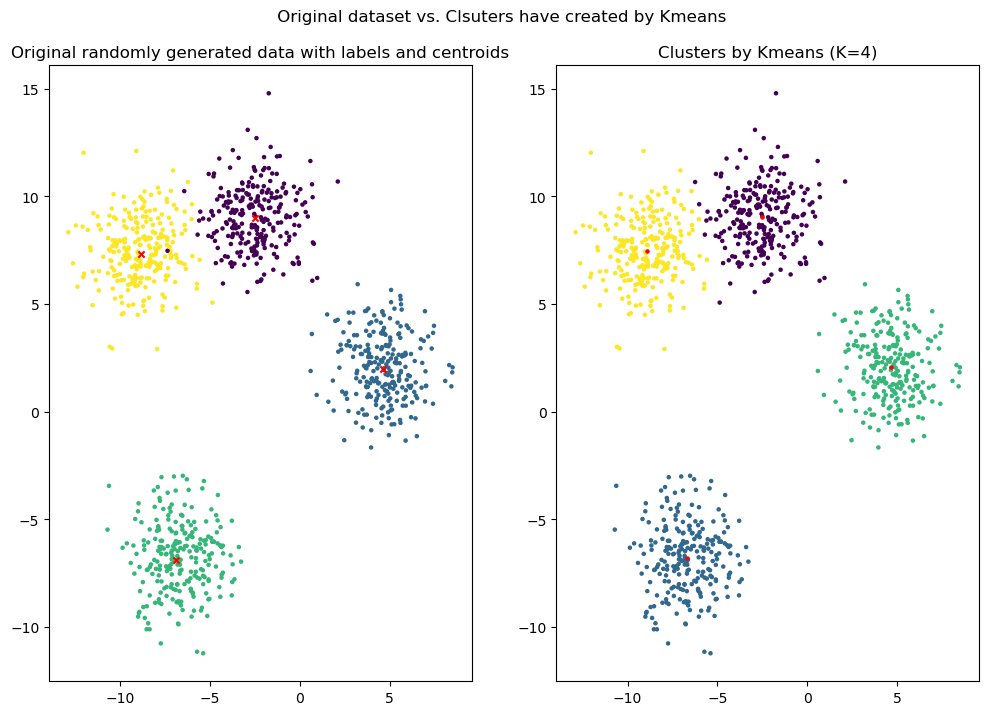

In [375]:
#Plot the clusters
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

axs[0].scatter(X[:, 0], X[:, 1], s=5, c=y)
axs[0].scatter(centroides[:, 0], centroides[:,1], s=20, c='red', marker='x' )
axs[0].set_title("Original randomly generated data with labels and centroids")

axs[1].scatter(X[:, 0], X[:, 1], s=5, c=clusters.labels_)
axs[1].scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:,1], s=5, c='red', marker='o' )
axs[1].set_title(f"Clusters by Kmeans (K={n_clusters})")

plt.suptitle(" Original dataset vs. Clsuters have created by Kmeans").set_y(0.95)
plt.show()

**Note:** About item 3 of the pseudo-algorithm, we can state that the algorithm makes the calculation easier at each iteration to find the minimizing point, as analytically we know that the arithmetic mean is exactly this point. This shows that the average is an important central measure that plays a main role in this algorithm.


Let's now see how the centroids move until they reach convergence or stop moving.

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availa

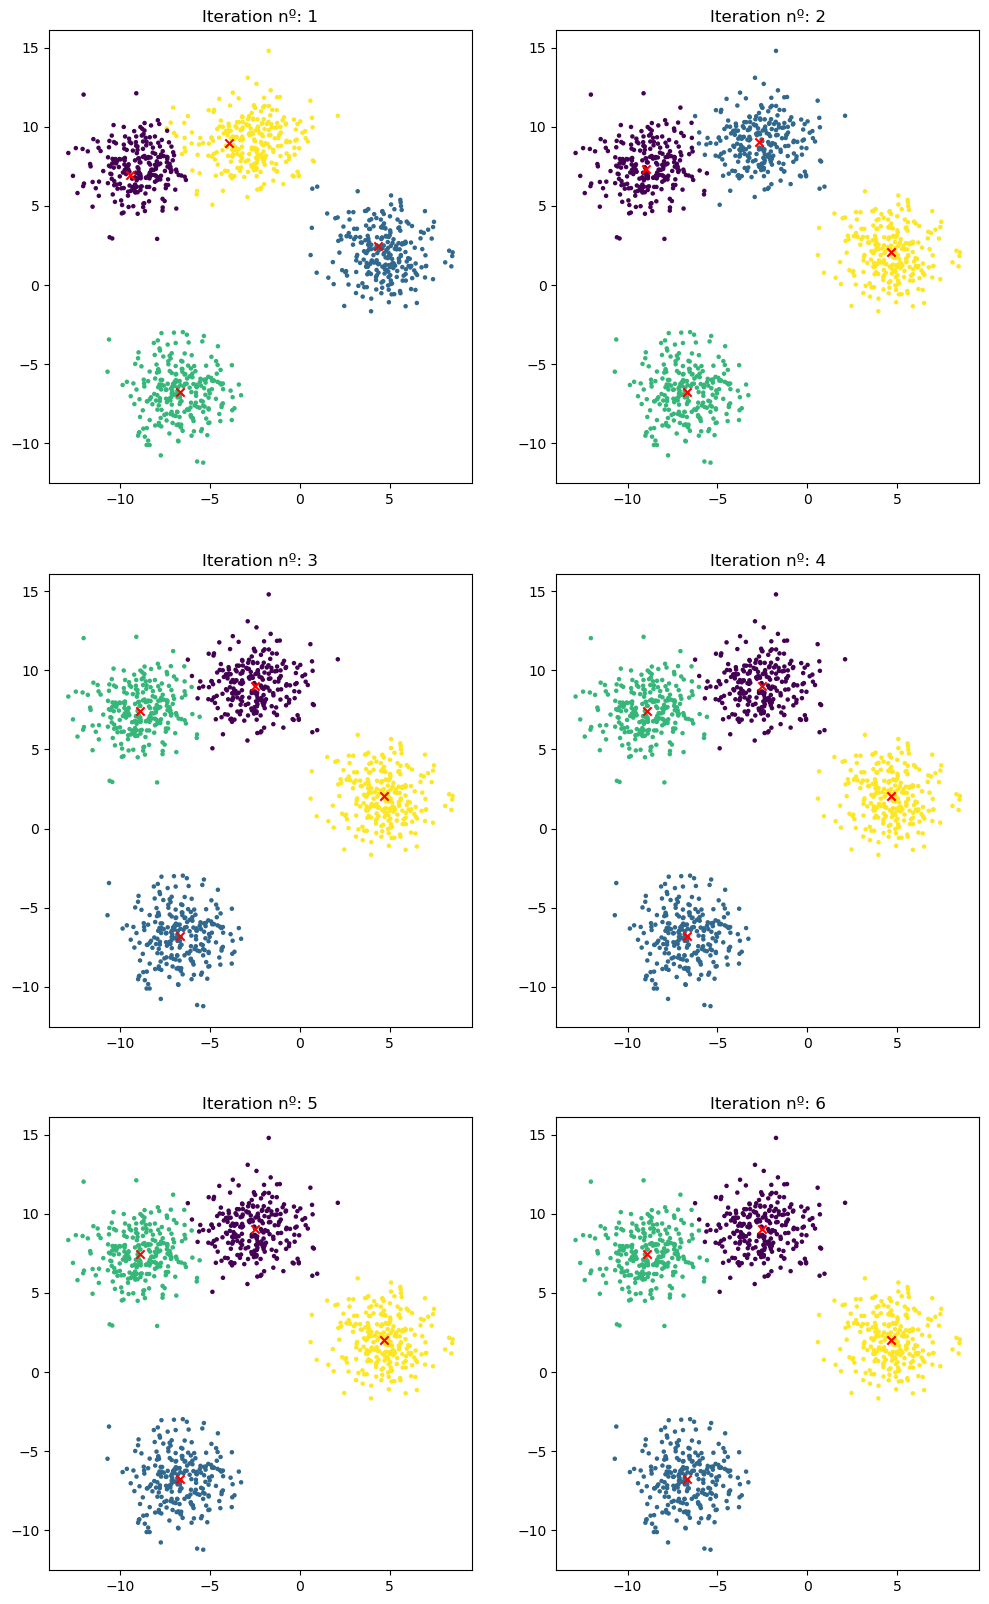

In [376]:
#Show iterations of Kmeans
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(12,20))
c=0
d=0
for i in range(6):
    axs[c,d].title.set_text(f"Iteration nº: {i+1}")
    kmeans = KMeans(n_clusters=4,
                    random_state=42,
                    max_iter=i+1, 
                    init='random',
                    )
    kmeans.fit(X, )
    centroids=kmeans.cluster_centers_
    axs[c,d].scatter(X[:,0], X[:,1], c=kmeans.labels_ , s=5)  
    axs[c,d].scatter(kmeans.cluster_centers_[:, 0],  
                     kmeans.cluster_centers_[:, 1],
                     c='red',
                     marker='x'
                     )
    d+=1
    if d==2:
        c+=1
        d=0

In [377]:
#Elbow method
inertia = []
K = range(1, 11)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availa

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availa

In [378]:
count =1
for i in inertia:
    print(f'Iteration {count}: {i}')
    count += 1

Iteration 1: 69257.33081597078
Iteration 2: 34070.95919180617
Iteration 3: 9736.011640355166
Iteration 4: 4359.521572473554
Iteration 5: 3952.74765066355
Iteration 6: 3552.9796729155305
Iteration 7: 3153.1042203802326
Iteration 8: 2811.481338437118
Iteration 9: 2568.7993840147924
Iteration 10: 2329.8634240607066


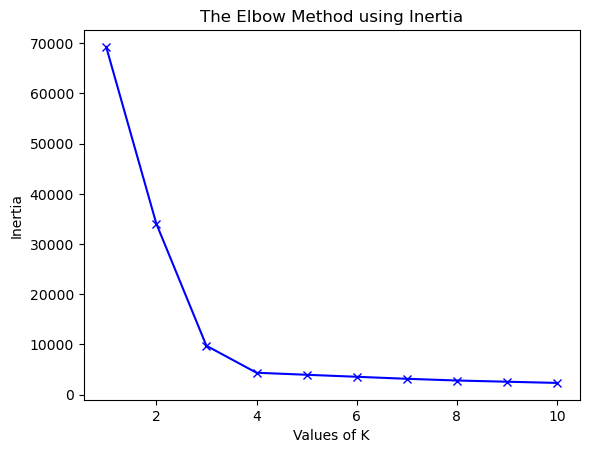

In [379]:

plt.plot(list(K), inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Parte III

## Exercise 1 - Digit image classification with k-means. 

Let us classify digits of the database contained in sklearn library of python using the k-means algorithm.

Import the library that contains our dataset

In [380]:
from sklearn.datasets import load_digits

#We load the digit images

digits = load_digits()
data = digits.data
labels = digits.target
data.shape

(1797, 64)

In [381]:
print(data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [382]:
type(data)

numpy.ndarray

(-0.5, 7.5, 7.5, -0.5)

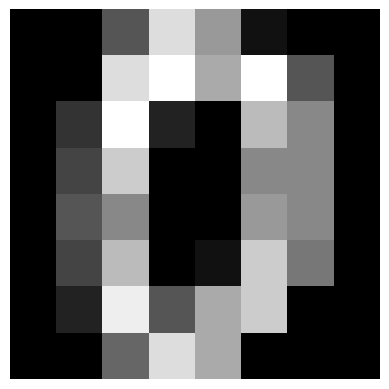

In [383]:
plt.imshow(data[0].reshape(8, 8), cmap='gray')
plt.axis('off')

In [384]:
print(255 - data[0])

[255. 255. 250. 242. 246. 254. 255. 255. 255. 255. 242. 240. 245. 240.
 250. 255. 255. 252. 240. 253. 255. 244. 247. 255. 255. 251. 243. 255.
 255. 247. 247. 255. 255. 250. 247. 255. 255. 246. 247. 255. 255. 251.
 244. 255. 254. 243. 248. 255. 255. 253. 241. 250. 245. 243. 255. 255.
 255. 255. 249. 242. 245. 255. 255. 255.]


(-0.5, 7.5, 7.5, -0.5)

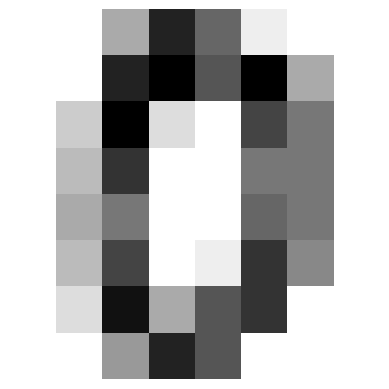

In [385]:
plt.imshow(255 - data[0].reshape(8, 8), cmap='gray')
plt.axis('off')

Pixels from the square image of  8×8
  pixels have been reshped in a row of  64
  elements. Therefore, each row is an object or data. The characteristics or properties of each object are the gray intensities of each pixel. That is, we have, for each image,  64
  properties.





In [386]:
#To improve the visualization, we invert the colors
data = 255.0 - data

In [387]:
print(data[0])

[255. 255. 250. 242. 246. 254. 255. 255. 255. 255. 242. 240. 245. 240.
 250. 255. 255. 252. 240. 253. 255. 244. 247. 255. 255. 251. 243. 255.
 255. 247. 247. 255. 255. 250. 247. 255. 255. 246. 247. 255. 255. 251.
 244. 255. 254. 243. 248. 255. 255. 253. 241. 250. 245. 243. 255. 255.
 255. 255. 249. 242. 245. 255. 255. 255.]


In [388]:
#We fix the seed to obtain the initial centroids, so the results obtained here are repeatable.
np.random.seed(1)

In [389]:
#Since we have 10 different digits (from 0 to 9) we choose to group the images in  10   clusters

n = 10

#We classify the data with k-means
#########################################################    
#                                                       #
###########   YOUR CODE HERE   ##########################
#                                                      #
#########################################################

kmeans = KMeans(n_clusters=n,init='random',)
kmeans.fit(data)
predictions = kmeans.predict(data)



C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [390]:
Z.shape

(1797,)

cluster 0
182 elements


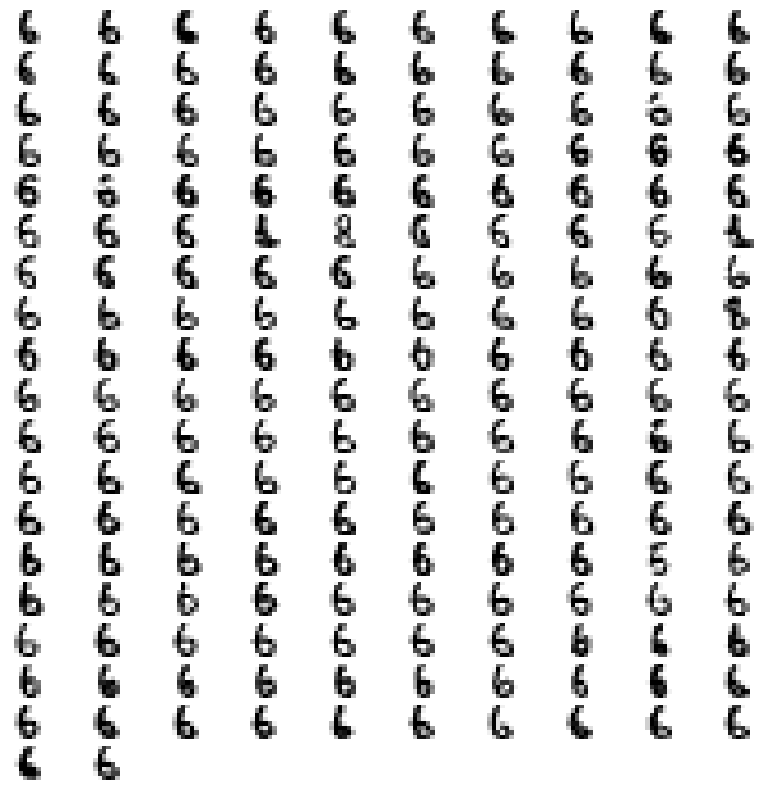

cluster 1
176 elements


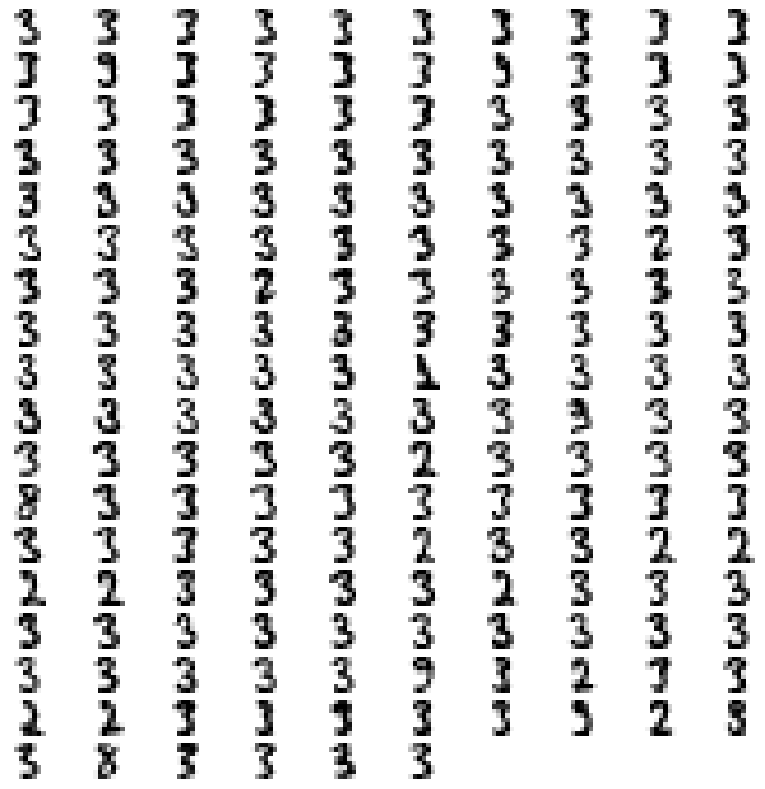

cluster 2
169 elements


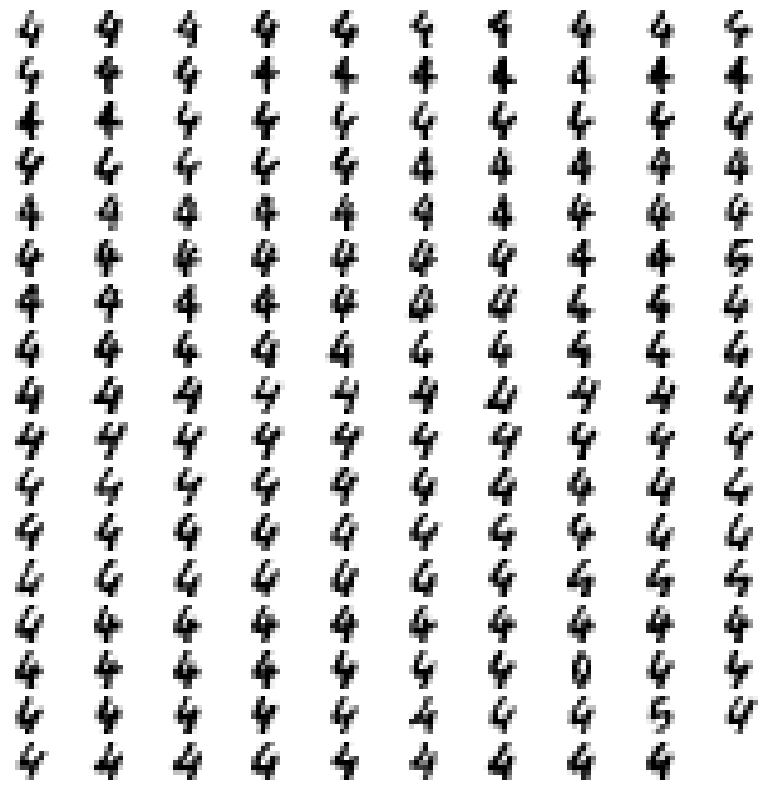

cluster 3
248 elements


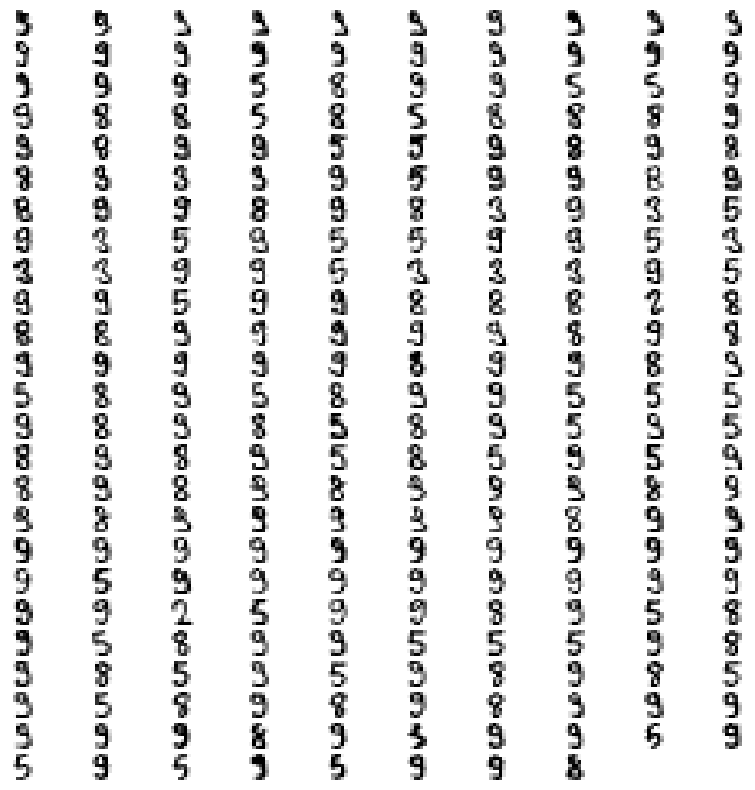

cluster 4
223 elements


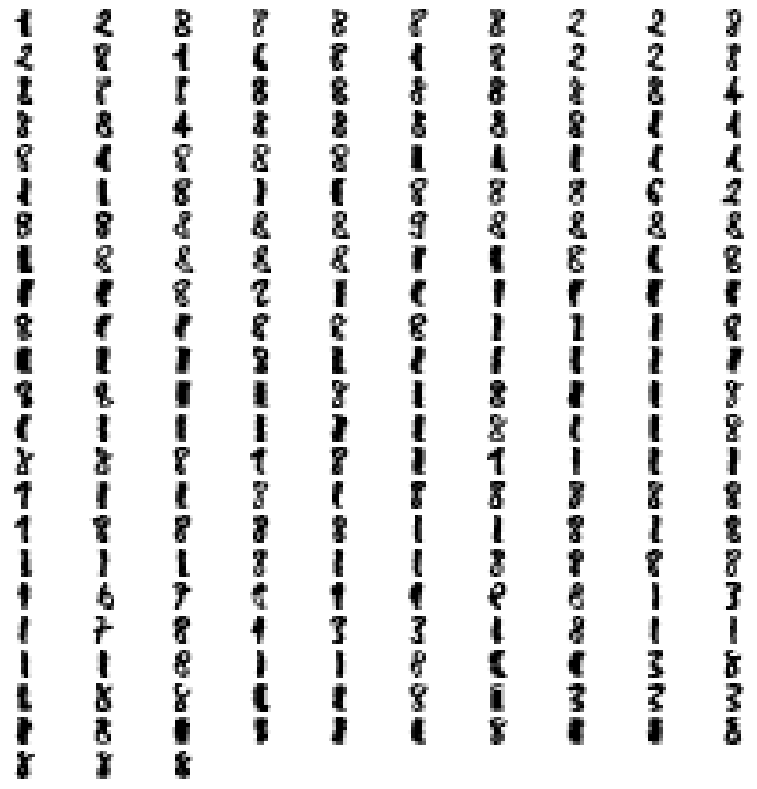

cluster 5
149 elements


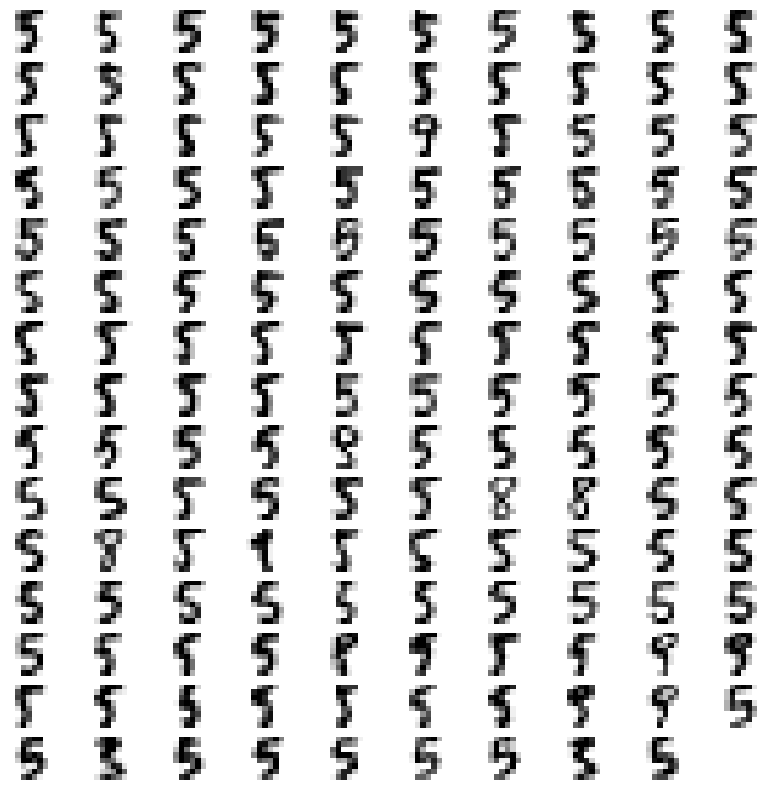

cluster 6
174 elements


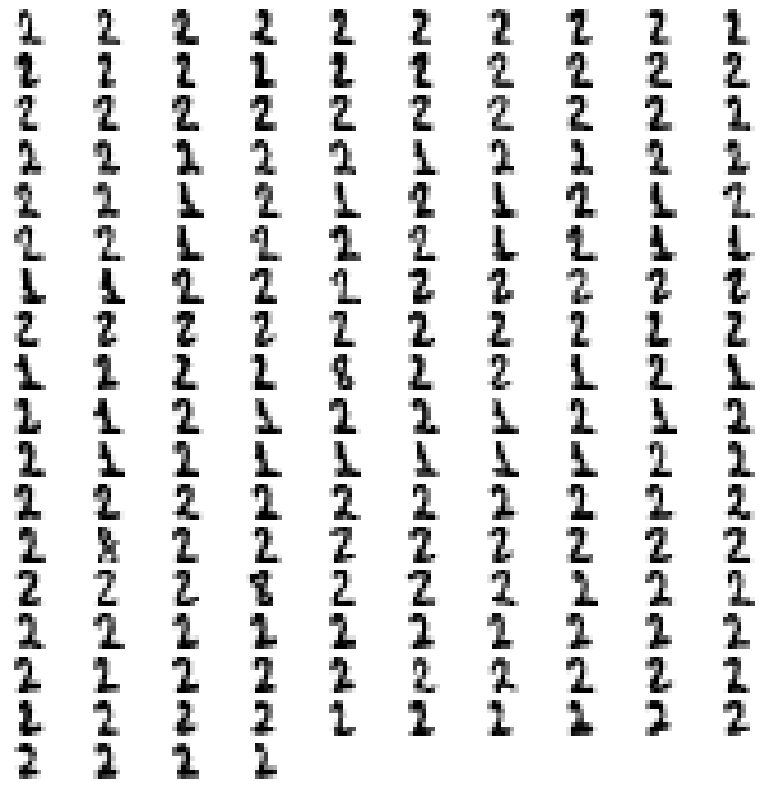

cluster 7
209 elements


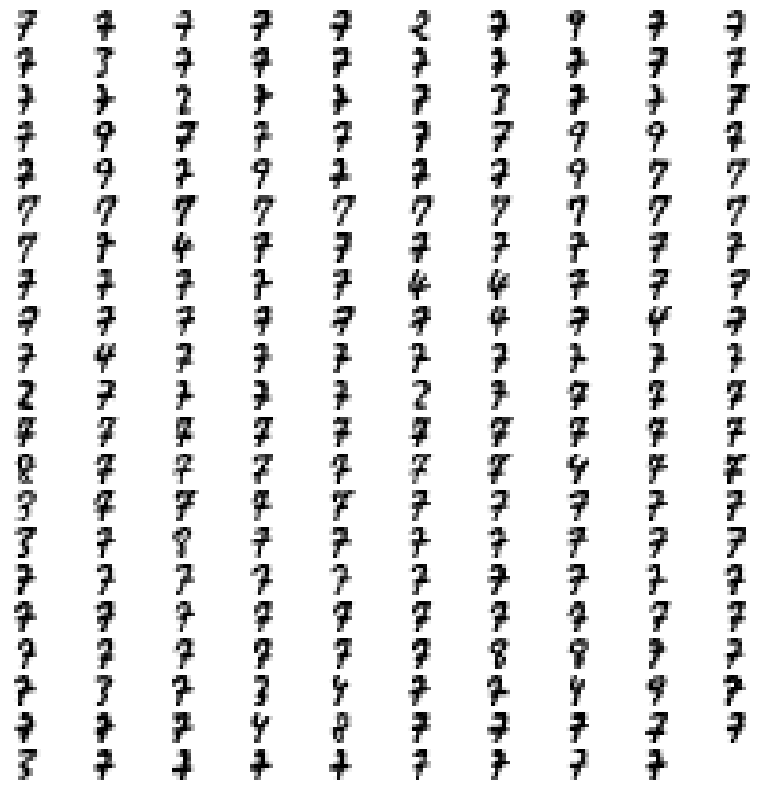

cluster 8
88 elements


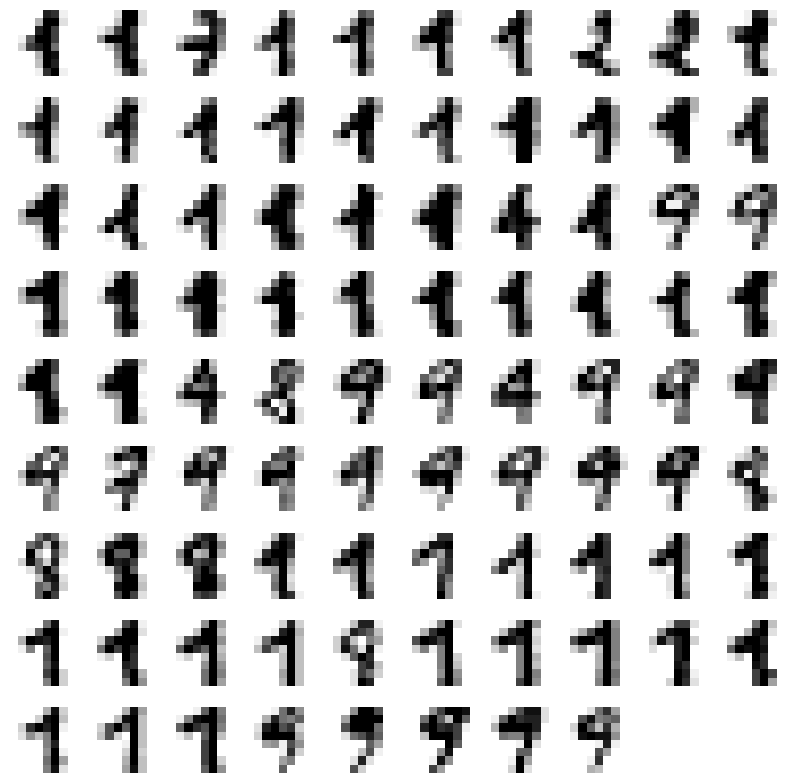

cluster 9
179 elements


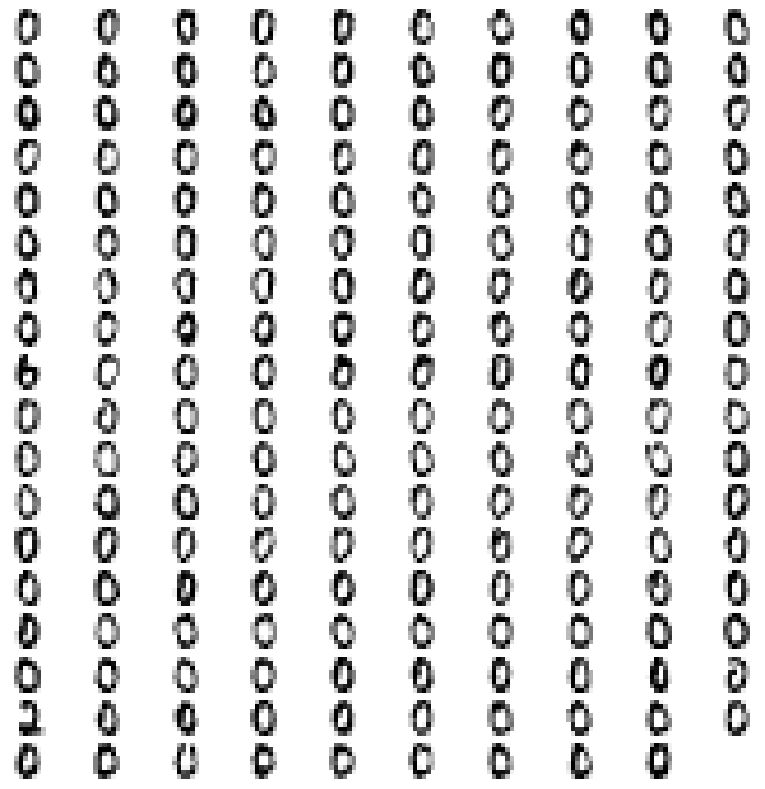

In [391]:
#We plot the resulting clusters

for i in range(0,n):

    row = np.where(predictions==i)[0]  # row in Z for elements of cluster i
    num = row.shape[0]       #  number of elements for each cluster
    r = int(np.floor(num/10.))   # number of rows in the figure of the cluster 

    print("cluster "+ str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = data[row[k], ]
        image = image.reshape(8, 8)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

In [392]:
#Task - Compute model accuracy 
#Hint: Load this --> from sklearn.metrics import confusion_matrix, accuracy_score
#########################################################    
#                                                       #
###########   YOUR CODE HERE   ##########################
#                                                      #
#########################################################

0.18530884808013356


## Exercise 2 (Challenge) - Image quantification with k-means. 

Quantification is a lossy compression technique that consists of grouping a whole range of values into a single one. If we quantify the color of an image, we reduce the number of colors necessary to represent it and the file size decreases. This is important, for example, to represent an image on devices that only support a limited number of colors.

In [393]:
#We load the image
I = Image.open(r"C:\Users\CTW03366\Pictures\tres-dias-salvador.webp")


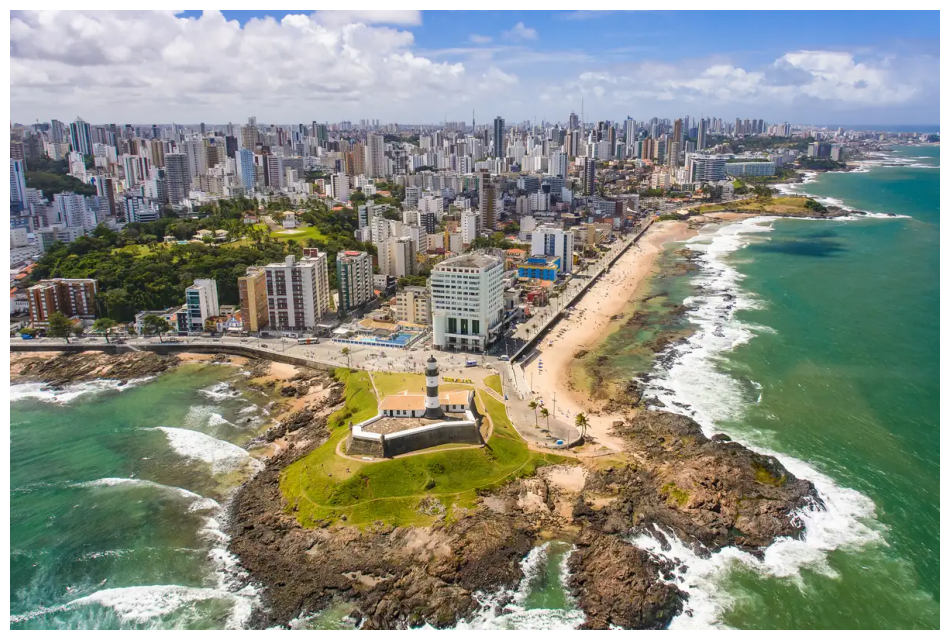

In [394]:
#We transform it into a numpy array

I1 = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(I1)
plt.axis('off')
plt.show()

In [395]:
I1.shape

(800, 1200, 3)

In [396]:
#In this case our objects are the pixels and their properties are the intensities of red, green and blue associated with each one. Therefore we have as many data or objects as pixels and three features or properties for each pixel. We will have as many different colors as different RGB triple. We count the number of different colors.

w, h = I.size
colors = I.getcolors(w * h)
num_colors = len(colors) 
num_pixels = w*h 

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  960000
Number of colors =  176913


In [397]:
#To apply k-means, we need an array with as many rows as pixels and for each row/pixel, 3 columns, one for each color intensity (red, green and blue).

#We extract the three channels

R = I1[:,:,0]
G = I1[:,:,1]
B = I1[:,:,2]

In [398]:
#We convert matrices into one-dimensional matrices and build the three-column matrix described above.

XR = R.reshape((-1, 1))  
XG = G.reshape((-1, 1)) 
XB = B.reshape((-1, 1)) 

X = np.concatenate((XR,XG,XB),axis=1)

In [399]:
XR.shape

(960000, 1)

In [400]:
X.shape

(960000, 3)

In [401]:
#We will group the 172388 colors into 60 groups or new colors, which will correspond to the centroids obtained with the k-means

n = 4
k_means = KMeans(n_clusters=n)
k_means.fit(X)

C:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [402]:
#The final centroids are the new colors and each pixes has been assigned a label the indicates the cluster it belongs.
#########################################################    
#                                                       #
###########   YOUR CODE HERE   ##########################
#                                                      #
#########################################################

In [403]:
centroids

array([[0.45284063, 0.4698297 , 0.3632834 ],
       [0.8357637 , 0.8266393 , 0.8354887 ],
       [0.2562843 , 0.30645293, 0.22261727],
       [0.6123882 , 0.6366913 , 0.6758256 ]], dtype=float32)

In [404]:
labels.shape

(960000,)

In [405]:
#We reconstruct the matrix of the image from the labels and the colors (intensities of red, green and blue) of thecentroids.

m = XR.shape
for i in range(m[0]):
    #########################################################    
    #                                                       #
    ###########   YOUR CODE HERE   ##########################
    #                                                      #
    #########################################################
   
    
#To come back original shape   
XR.shape = R.shape 
XG.shape = G.shape
XB.shape = B.shape 

XR = XR[:, :, np.newaxis]  
XG = XG[:, :, np.newaxis]
XB = XB[:, :, np.newaxis]

Y = np.concatenate((XR,XG,XB),axis=2)

In [406]:
Y.shape

(800, 1200, 3)

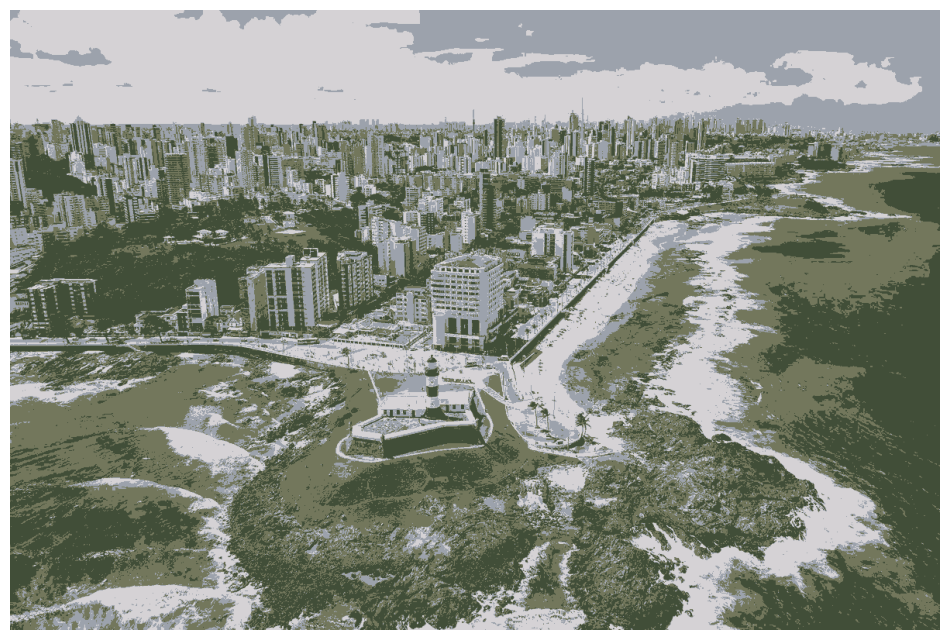

In [407]:
#View the new image with only 60 colors

plt.figure(figsize=(12,12))
plt.imshow(Y)
plt.axis('off')
plt.show()

In [408]:
#Check number of colors and pixels
print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', n)

Number of pixels =  960000
Number of colors =  4


In [409]:
#[Optinoal] We save the image in jpg format
#Y1 = np.floor(Y*255)
#Image.fromarray(Y1.astype(np.uint8)).save("shop2.jpg")

**Referênce:**

[1] Source online: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans. 

[2] Source online: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py